<a href="https://colab.research.google.com/github/rubyvanrooyen/astrokat/blob/master/notebooks/astrokat_targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AstroKAT calibrator selection tools
Helper scripts to help the user select calibrators from MeerKAT catalogues give observation target(s).    
For more detail refer to the
[MeerKAT calibrator selection](https://github.com/ska-sa/astrokat/wiki/MeerKAT-calibrator-selection)
documentation on the
[AstroKAT](https://github.com/ska-sa/astrokat/wiki)
wiki page.

## Installation and setup

In [ ]:
!pip install git+https://github.com/ska-sa/astrokat.git

In [ ]:
!git clone https://github.com/ska-sa/astrokat.git

In [2]:
!ln -s /content/astrokat/scripts/astrokat-targets.py mkatcals.py

In [3]:
import astrokat
import mkatcals

## User input

In [4]:
#@title List of tags specifying types of calibrators to provide
gain = True #@param {type:"boolean"}
flux = True #@param {type:"boolean"}
bandpass = True #@param {type:"boolean"}
polarisation = False #@param {type:"boolean"}

cal_tags = []
if gain: cal_tags.append('gain')
if flux: cal_tags.append('flux')
if bandpass: cal_tags.append('bp')
if polarisation: cal_tags.append('pol')

print(f'Calibrator tags {cal_tags}')

Calibrator tags ['gain', 'flux', 'bp']


In [5]:
#@title Celestial target
#@markdown target name
name = 'NGC641_03D03' #@param {type:"string"}
#@markdown Right Ascension (HH:MM:ss.f)
ra =  '01:38:13.250' #@param {type:"string"}
#@markdown Declination (DD:MM:ss.f)
dec =  '-42:37:41.000' #@param {type:"string"}

target = [name, ra, dec]
print(f'Target: {target}')

Target: ['NGC641_03D03', '01:38:13.250', '-42:37:41.000']


## List observation target and calibrators and show elevation plot
```
astrokat-targets.py --target 'NGC641_03D03' '01:38:13.250' '-42:37:41.000' --cal-tags gain bp flux --lst --cat-path astrokat/catalogues/
```


Observation Table for 2021/4/10 14:29:27 (UTC)
Times listed in LST for target rise and set times
Target visible when above 20.0 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
NGC641_03D03    radec target                    1:38:13.25      -42:37:41.0     19:37:56.68     7:40:14.01      50.94           Separation from Sun
J0010-4153      radec bpcal                     0:10:52.52      -41:53:10.8     18:12:33.10     6:11:15.34      16.13 ***       Separation from NGC641_03D03
J0155-4048      radec gaincal                   1:55:37.06      -40:48:42.4     19:59:36.25     7:53:20.21      3.72                            
J0408-6545      radec bpcal fluxcal             4:08:20.38      -65:45:09.1     20:46:46.57     11:30:08.98     31.01 ***                       
J1939-6342      radec bpcal fluxcal             19:39:25.03     -63:42:45.6     12:30:44.40     2:51:56.86      52.49 ***  

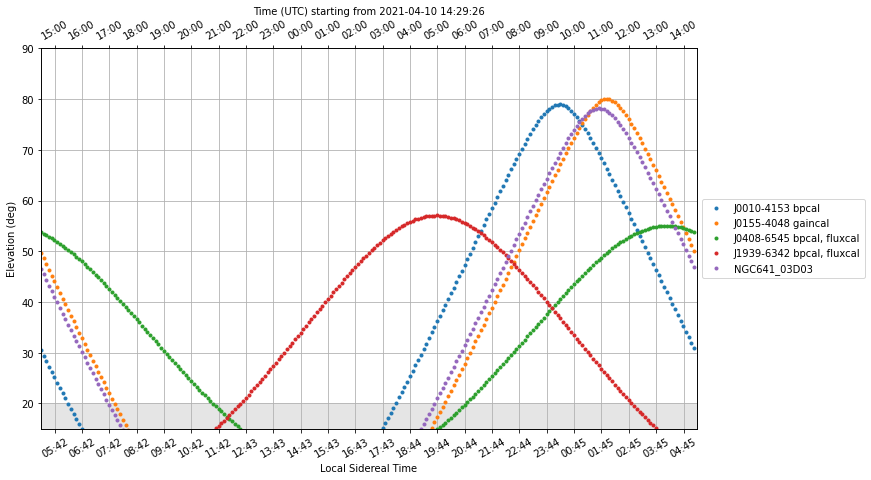

In [6]:
mkatcals.main(target=target, cal_tags=cal_tags, mkat_catalogues='/content/astrokat/catalogues', lst=True)

## List and show elevation plot for observation at selected date
```
astrokat-targets.py --cal-tags gain bp flux --infile sample_targetlist_for_cals.csv --datetime '2018-04-06 12:34' --horizon 17
```

Observation catalogue sample_targetlist_with_cals.csv

Observation Table for 2018/4/6 12:34:00 (UTC)
Times listed in UTC for target rise and set times
Target visible when above 17.0 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
NGC641_02D02    radec target                    1:39:25.01      -42:14:49.2     04:54:33        17:28:46        49.50           Separation from Sun
NGC641_02D03    radec target                    1:40:36.77      -42:37:41.0     04:54:43        17:30:59        49.92                           
NGC641_02D04    radec target                    1:39:25.01      -43:00:32.8     04:52:30        17:30:49        50.25                           
NGC641_03D02    radec target                    1:37:01.49      -42:14:49.2     04:52:10        17:26:23        49.41                           
NGC641_03D03    radec target                    1:38:13.25      -42:37:41.0     04

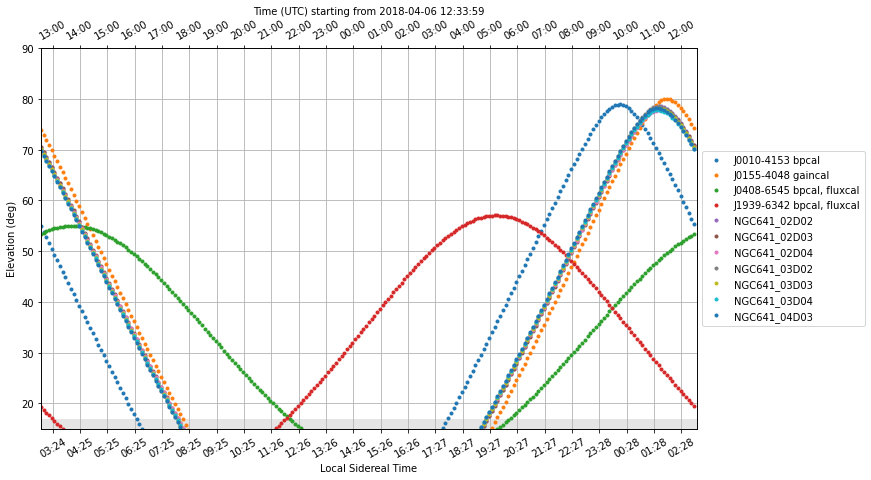

In [7]:
infile = '/content/astrokat/astrokat/test/test_cals/sample_targetlist_for_cals.csv'
mkatcals.main(creation_time = '2018-04-06 12:34',
              horizon=17,
              infile=infile,
              outfile='sample_targetlist_with_cals.csv',
              cal_tags=cal_tags,
              mkat_catalogues='/content/astrokat/catalogues')

## View existing observation
```
astrokat-targets.py --view sample_targetlist_for_cals.yaml --datetime '2018-04-06 12:34'
```


Observation Table for 2018/4/6 12:34:00 (UTC)
Times listed in UTC for target rise and set times
Target visible when above 17.0 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
NGC641_02D02    radec target                    1:39:25.01      -42:14:49.2     04:54:33        17:28:46        49.50           Separation from Sun
NGC641_02D03    radec target                    1:40:36.77      -42:37:41.0     04:54:43        17:30:59        49.92                           
NGC641_02D04    radec target                    1:39:25.01      -43:00:32.8     04:52:30        17:30:49        50.25                           
NGC641_03D02    radec target                    1:37:01.49      -42:14:49.2     04:52:10        17:26:23        49.41                           
NGC641_03D03    radec target                    1:38:13.25      -42:37:41.0     04:52:20        17:28:36        49.83                   

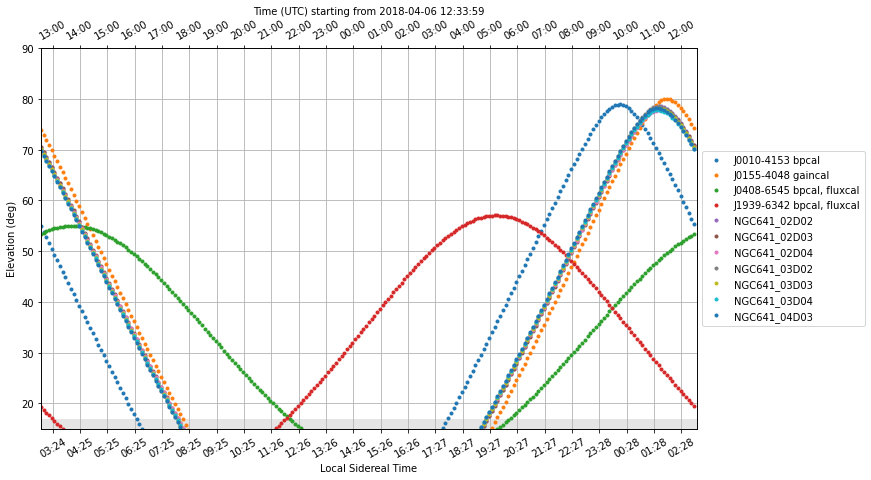

In [8]:
mkatcals.main(creation_time = '2018-04-06 12:34',
              horizon=17,
              viewfile='sample_targetlist_with_cals.csv')